In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import glob
from skimage.io import imread, imshow
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
%matplotlib inline

2022-01-19 19:46:58.817258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-19 19:46:58.817316: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# load model 
from keras.models import Model,load_model, Sequential
model = load_model('best_weights.hdf5')
model.load_weights('best_weights.hdf5')

2022-01-19 19:47:00.271222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-19 19:47:00.271287: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-19 19:47:00.271320: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4ca66b5771c3): /proc/driver/nvidia/version does not exist
2022-01-19 19:47:00.271721: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The probability of being Recycle is 0.0000129%
The probability of being Organic is 99.9999871%
The image belongs to Organic waste category 


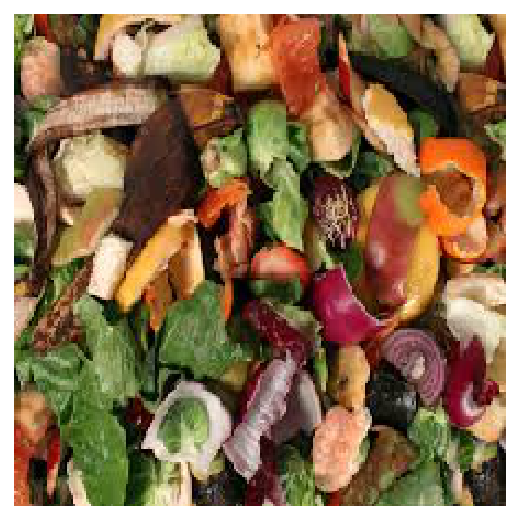

In [4]:
# Test Case
img = load_img('images/O_13968.jpg', target_size=(224,224))
img = img_to_array(img)
img = img / 255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)


def predict_prob(number):
    return [number[0],1-number[0]]
ans = np.array(list(map(predict_prob, model.predict(img))))

print("The probability of being Recycle is {:.7f}%".format(ans[0][0]*100))
print("The probability of being Organic is {:.7f}%".format((ans[0][1])*100))

if ans[0][0] > 0.5:
    print("The image belongs to Recycle waste category")
else:
    print("The image belongs to Organic waste category ")